# Practico 3 y 4
## Inclusion de librerias y módulos

In [1]:
# Inclusion de librerias y módulos
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Separación
from sklearn.model_selection import train_test_split

# Gradiente Descendente
from sklearn.linear_model import SGDClassifier

# Árbol de Decisión
# from sklearn.tree import DecisionTreeClassifier, plot_tree

# Validación Cruzada de HP en grilla.
from sklearn.model_selection import GridSearchCV

# Normalización
from sklearn.preprocessing import StandardScaler

# Utiles
from utiles import basic_metrics
from utiles import plot_cm
from utiles import plot_roc_pr

# Colores
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

# Plot axes y legends parambs
plt.rcParams["axes.labelweight"]   = "bold"
plt.rcParams["axes.titleweight"]   = "bold"
plt.rcParams["legend.shadow"]      = True
plt.rcParams["figure.titleweight"] = "bold"

## Carga, división y normalización de los datos

In [2]:
filename = 'yup_curated_data.csv'
dataset = pd.read_csv(os.path.join('..', 'dataset', filename))

# Dividimos entre entrada y referencia
X, y = dataset.iloc[:, :-1], dataset.student_rating_cat

# Division entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizamos los datos para mejorar convergencia
StdScaler = StandardScaler()
StdScaler.fit(X_train)
X_train = StdScaler.transform(X_train)
X_test  = StdScaler.transform(X_test)

In [3]:
SGD = SGDClassifier(random_state=42)

print('Parámetros utilizados: \n', np.array(list(SGD.get_params(deep=False).items())))

Parámetros utilizados: 
 [['alpha' 0.0001]
 ['average' False]
 ['class_weight' None]
 ['early_stopping' False]
 ['epsilon' 0.1]
 ['eta0' 0.0]
 ['fit_intercept' True]
 ['l1_ratio' 0.15]
 ['learning_rate' 'optimal']
 ['loss' 'hinge']
 ['max_iter' 1000]
 ['n_iter_no_change' 5]
 ['n_jobs' None]
 ['penalty' 'l2']
 ['power_t' 0.5]
 ['random_state' 42]
 ['shuffle' True]
 ['tol' 0.001]
 ['validation_fraction' 0.1]
 ['verbose' 0]
 ['warm_start' False]]


### Entrenamiento

In [4]:
SGD.fit(X_train, y_train)

SGDClassifier(random_state=42)

### Predicción

In [5]:
y_train_SGD = SGD.predict(X_train)
y_test_SGD = SGD.predict(X_test)

In [6]:
print('************************************************************')
cm_train = basic_metrics(y_train, y_train_SGD, 'Train')
print('------------------------------------------------------------')
cm_test = basic_metrics(y_test, y_test_SGD, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      0.706     0.153     0.252      2899
           1      0.816     0.983     0.892     11044

    accuracy                          0.811     13943
   macro avg      0.761     0.568     0.572     13943
weighted avg      0.793     0.811     0.759     13943

Confusion Matrix: 
[[  444  2455]
 [  185 10859]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      0.669     0.119     0.202       699
           1      0.817     0.985     0.893      2787

    accuracy                          0.812      3486
   macro avg      0.743     0.552     0.547      3486
weighted avg      0.787     0.812     0.755      3486

Confusion Matrix: 
[[  83  616]
 [  41 2746]]
------------------------------------------------------------


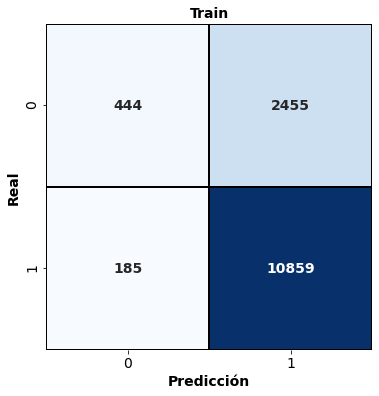

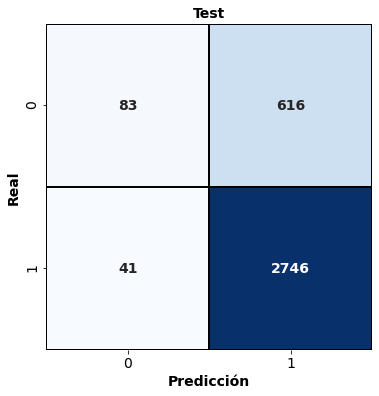

In [7]:
# Train Matriz de confusion
plot_cm(cm_train, figsize=(10,6), title='Train', cmap='Blues');

# Test Matriz de confusion
plot_cm(cm_test, figsize=(10,6), title='Test', cmap='Blues');

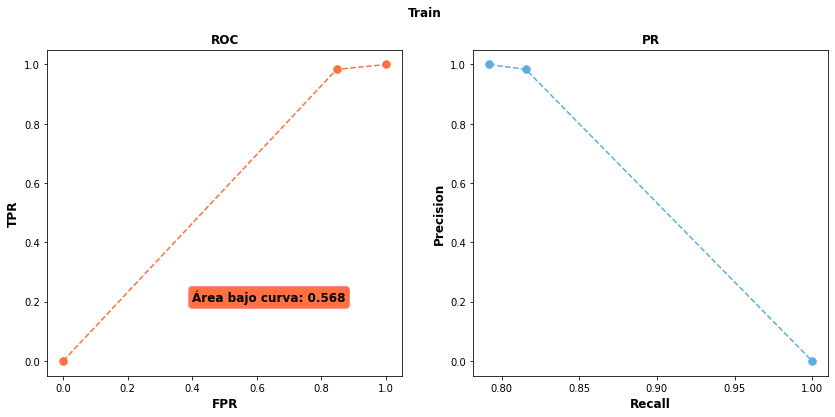

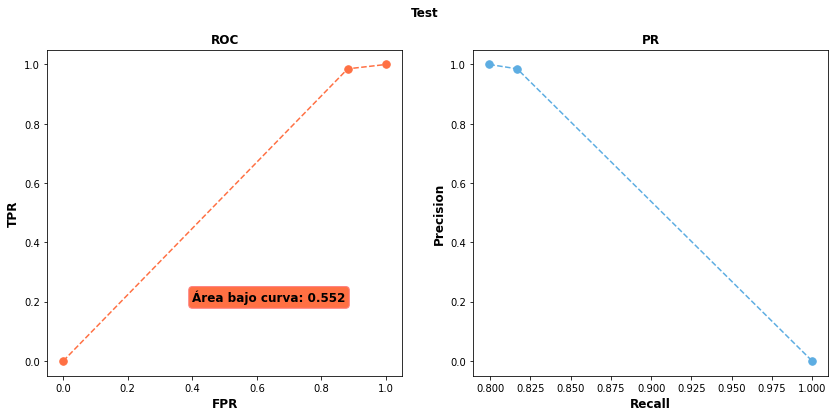

In [8]:
plot_roc_pr(y_train, y_train_SGD, Title='Train', x_text=0.4, y_text=0.2, size_text=12, size=(14,6), ms=15, colorR=RED, colorP=BLUE, label=None);
plot_roc_pr(y_test, y_test_SGD, Title='Test', x_text=0.4, y_text=0.2, size_text=12, size=(14,6), ms=15, colorR=RED, colorP=BLUE, label=None);

In [3]:
SGD = SGDClassifier(penalty='elasticnet', random_state=42)

In [4]:
param_grid_GD2 = [
  {'learning_rate': ['constant', 'adaptive'],
          'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
          'l1_ratio': list(np.linspace(0, 1, 11))+[0.15], #Para que exista el Default
          'alpha': np.logspace(-5, 0, 6),
          'eta0': np.logspace(-5, 0, 6)
          },
  {'learning_rate': ['optimal'],
          'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
          'l1_ratio': list(np.linspace(0, 1, 11))+[0.15], #Para que exista el Default
          'alpha': np.logspace(-5, 0, 6),
          'eta0': [0] #No utilizado al ser Optimal
          }
]

In [6]:
GSCV = GridSearchCV(SGD, param_grid_GD2, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1, verbose=4)
GSCV.fit(X_train, y_train);

Fitting 5 folds for each of 3744 candidates, totalling 18720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 1886 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2620 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3454 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5414 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6540 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7766 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 9088 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 10510 tasks      | 

In [14]:
# Pasamos a DF los Resultados
Res_GSCV = pd.DataFrame(GSCV.cv_results_)
# Res_GSCV[Res_GSCV.rank_test_accuracy==1]
# Res_GSCV[Res_GSCV.rank_test_precision_weighted==1], Res_GSCV[Res_GSCV.rank_test_recall_weighted==1], Res_GSCV[Res_GSCV.rank_test_f1_weighted==1]

In [22]:
Res_GSCV.to_csv('./results_to_analyze.csv')

In [15]:
Res_GSCV.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_eta0', 'param_l1_ratio', 'param_learning_rate',
       'param_loss', 'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_precision_weighted', 'split1_test_precision_weighted',
       'split2_test_precision_weighted', 'split3_test_precision_weighted',
       'split4_test_precision_weighted', 'mean_test_precision_weighted',
       'std_test_precision_weighted', 'rank_test_precision_weighted',
       'split0_test_recall_weighted', 'split1_test_recall_weighted',
       'split2_test_recall_weighted', 'split3_test_recall_weighted',
       'split4_test_recall_weighted', 'mean_test_recall_weighted',
       'std_test_recall_weighted', 'rank_test_recall_weighted',
       'split0_test_f1_weighted', 'split1_test_f1_weig

In [16]:
Res_GSCV[Res_GSCV.rank_test_accuracy==1].mean_test_accuracy

65     0.811949
73     0.811949
81     0.811949
585    0.811949
593    0.811949
601    0.811949
633    0.811949
641    0.811949
665    0.811949
Name: mean_test_accuracy, dtype: float64

In [18]:
Res_GSCV[Res_GSCV.rank_test_precision_weighted==1].mean_test_precision_weighted

3454    0.814025
Name: mean_test_precision_weighted, dtype: float64

In [19]:
Res_GSCV[Res_GSCV.rank_test_recall_weighted==1].mean_test_recall_weighted

65     0.811949
73     0.811949
81     0.811949
585    0.811949
593    0.811949
601    0.811949
633    0.811949
641    0.811949
665    0.811949
Name: mean_test_recall_weighted, dtype: float64

In [21]:
Res_GSCV[Res_GSCV.rank_test_f1_weighted==1].mean_test_f1_weighted

3457    0.763763
Name: mean_test_f1_weighted, dtype: float64